# **Project Background**

This project is looking at utilising average houseprices to formulate a time series forcast for future potential house prices. Understanding the future houses prices of a region is really important to many stakeholders such as first time buyers, renters, home owners, local authorities, and private building contractors.

Being able to forcast potential changes in the market will help predict the price of houses and subsiquently help inform potential saving routines, development of houses, and whether to sell a house. The project uses data from the ONS and used multiple functions within Python to help validate the dataset.

Hypothesis: First time Buyer prices value for London are going to increase overtime, and there will be strong growth in the next two years.

In [2]:
# data manipulation and analysis python packages
import pandas as pd
import numpy as np
import scipy

# plotting packages
import matplotlib.pyplot as plt
import seaborn as sns
# Set the style of all seaborn plots to 'seaborn-darkgrid'
plt.style.use('seaborn-darkgrid')

# modelling and evaluation
import statsmodels
import statsmodels.api as sm

<ipython-input-2-7ee28f0c23e1>:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


Checking that the input of data was successful, as well as, settinng the Quarter column as the index column.

In [3]:
Houseprice_df = pd.read_csv('London Dataset First Time Buyers.csv', index_col='Quarter', parse_dates=True, infer_datetime_format=True)
Houseprice_df.head()

<ipython-input-3-604551329e33>:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  Houseprice_df = pd.read_csv('London Dataset First Time Buyers.csv', index_col='Quarter', parse_dates=True, infer_datetime_format=True)
<ipython-input-3-604551329e33>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Houseprice_df = pd.read_csv('London Dataset First Time Buyers.csv', index_col='Quarter', parse_dates=True, infer_datetime_format=True)


,First time buyers
Quarter,
1993-01-01,63398
1993-04-01,67307
1993-07-01,65977
1993-10-01,64954
1994-01-01,62711


In [4]:
# Set the index frequency to Quarter Start
Houseprice_df.index.freq = 'QS'

Checking for gaps in the date feild.

In [5]:
# https://stackoverflow.com/a/71340523
gaps = pd.date_range(start=min(Houseprice_df.index),
                     end=max(Houseprice_df.index),
                     freq='QS').difference(Houseprice_df.index)
gaps

DatetimeIndex([], dtype='datetime64[ns]', freq='QS-JAN')

Checking for Null values in the First Time Buyers feild, as the model will not be able to run if there are null values.

In [6]:
Houseprice_df.isnull().sum() # check for null values..

First time buyers    0
dtype: int64

Sorting by date allows the data to be in cronilogical order.

In [7]:
Houseprice_df = Houseprice_df.sort_index() # sort by date index

Visualisation to make sure the data inputted can run correctly.

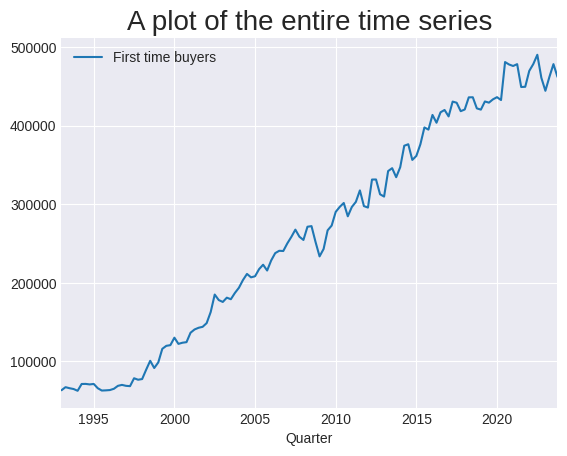

In [8]:
Houseprice_df.plot()

plt.title('A plot of the entire time series', fontsize = 20);

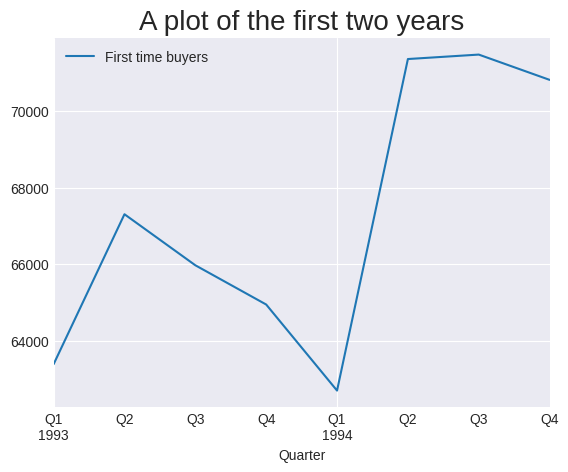

In [9]:
Houseprice_df.loc['1993':'1994'].plot()

plt.title("A plot of the first two years", fontsize = 20);

The creation of moving averages to allow for trends to be developed and seen easily. Using a 4 point, 6 point, and 12 point, allows the comparison of the moving averages to find the best fit to the model. However, overfitting also needs to be taken into consideration

In [10]:
Houseprice_df['4-MA'] =  Houseprice_df['First time buyers'].rolling(window=4,  center=True).mean()
Houseprice_df['6-MA'] =  Houseprice_df['First time buyers'].rolling(window=6,  center=True).mean()
Houseprice_df['12-MA'] = Houseprice_df['First time buyers'].rolling(window=12, center=True).mean()
Houseprice_df.head()

,First time buyers,4-MA,6-MA,12-MA
Quarter,,,,
1993-01-01,63398,NaN,NaN,NaN
1993-04-01,67307,NaN,NaN,NaN
1993-07-01,65977,65409.00,NaN,NaN
1993-10-01,64954,65237.25,65949.833333,NaN
1994-01-01,62711,66248.50,67294.833333,NaN


A graph showcasing the fit of the moving averages against the actual data. This helps represent the overfitting of the moving averages.

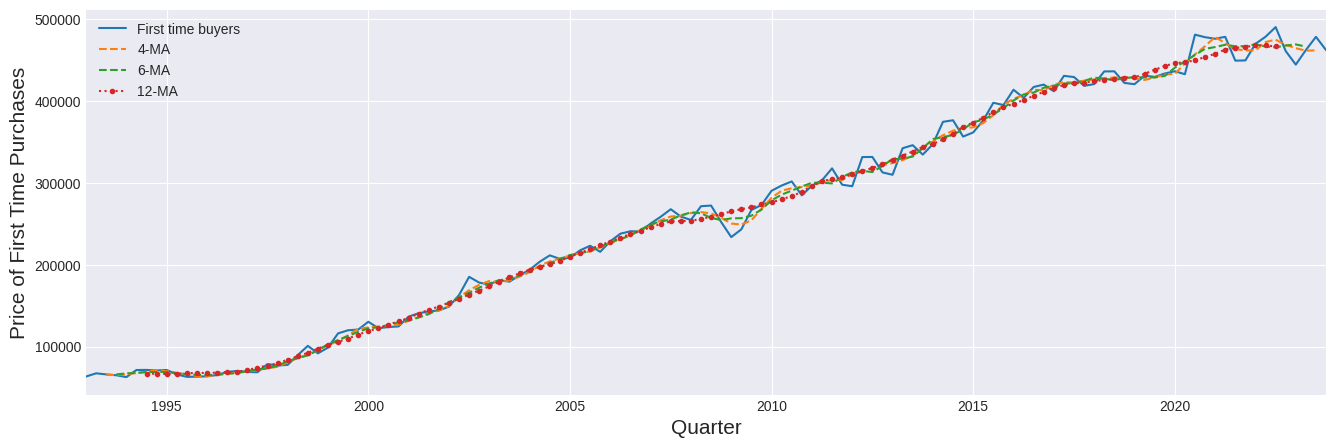

In [11]:
Houseprice_df.plot(style=['-','--','--',':.'],figsize=(16,5))

plt.xlabel('Quarter', fontsize=15)
plt.ylabel('Price of First Time Purchases', fontsize=15);

The de-trending of the dataset allows  seasonality and cyclical behaviours to be showcased clearer

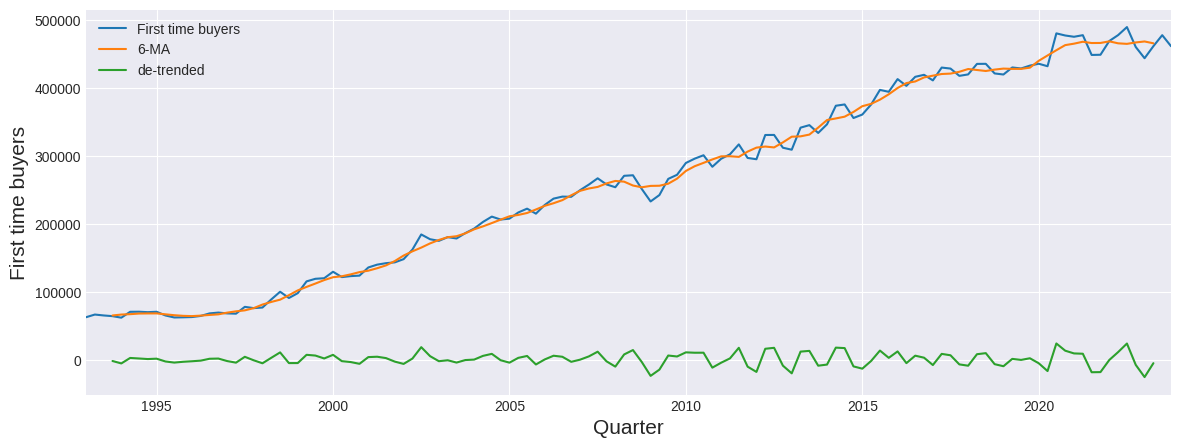

In [12]:
Houseprice_df['de-trended'] = Houseprice_df['First time buyers'] - Houseprice_df['6-MA']

Houseprice_df[['First time buyers','6-MA','de-trended']].plot(figsize=(14,5));

plt.xlabel('Quarter', fontsize = 15)
plt.ylabel('First time buyers', fontsize = 15);

This is to see if there are any seasonality trends within the dataset. This particular shows some, however the majority of the points do not showcase any sort of seasonal trend.

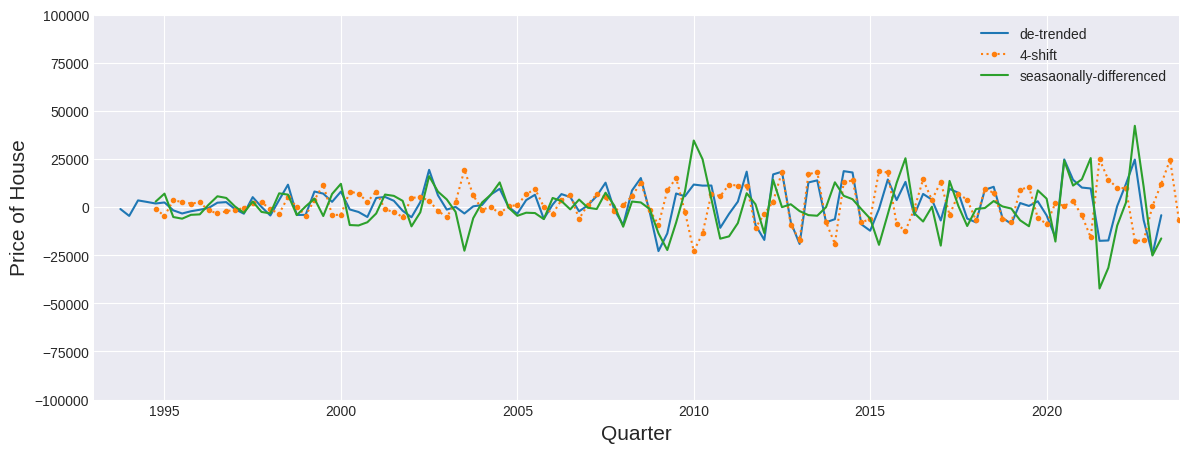

In [13]:
Houseprice_df['4-shift'] = Houseprice_df['de-trended'].shift(periods=4)

Houseprice_df['seasaonally-differenced'] = Houseprice_df['de-trended']- Houseprice_df['4-shift']

Houseprice_df[['de-trended', '4-shift', 'seasaonally-differenced']].plot(style=['-', ':.'],figsize=(14,5))


plt.ylim(-100000,100000)
plt.xlabel('Quarter', fontsize=15)
plt.ylabel('Price of House', fontsize=15);

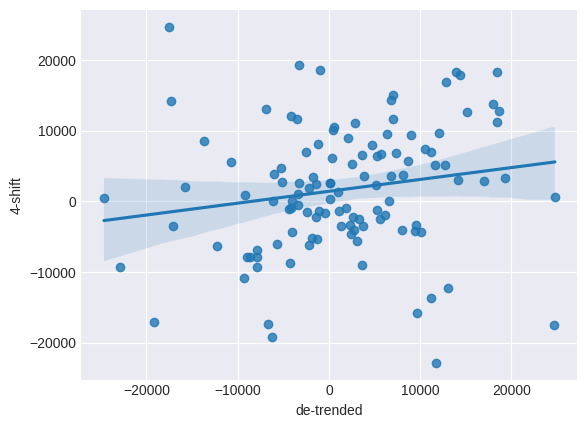

In [14]:
sns.regplot(data=Houseprice_df, x='de-trended', y='4-shift');

This is the co-efficant between the de-trended data and the shifted data. Due to the number being really low this showcases there is not a strong correlation between the data.

In [15]:
Houseprice_df['de-trended'].corr(Houseprice_df['4-shift']).round(2)

0.18

In [16]:
for shift in range(1,16):
    print(shift,':',Houseprice_df['de-trended'].corr(Houseprice_df['de-trended'].shift(shift)).round(2))

1 : 0.15
2 : -0.56
3 : -0.27
4 : 0.18
5 : 0.12
6 : -0.13
7 : 0.04
8 : 0.24
9 : -0.1
10 : -0.32
11 : 0.09
12 : 0.29
13 : -0.03
14 : -0.38
15 : 0.04


This showcases that the data is accurate as the 4 shift is comfortably in the 95% confidence range. This is why this was chosen over other period shifts, as the shift has a strong confidence level. However, this showcases an issue with the seasonality in the dataset as there is not a large correlationn between shifting time periods and de-trended data. Meaning that the likelyhood of seasons affecting the price is lower than expected.

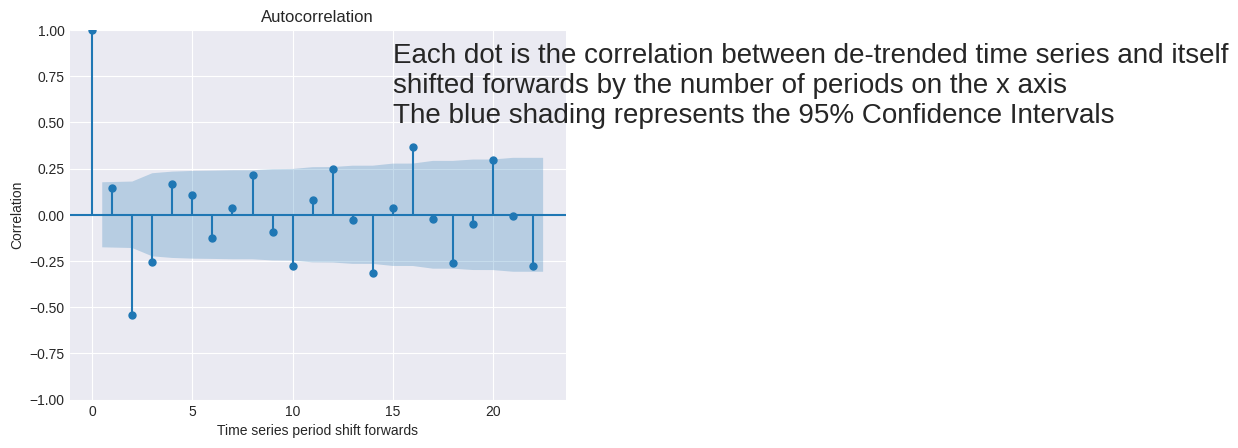

In [17]:
from statsmodels.graphics import tsaplots

tsaplots.plot_acf(Houseprice_df['de-trended'],missing='drop',lags=22,alpha=0.05)

plt.xlabel('Time series period shift forwards')
plt.ylabel('Correlation')

plt.text(15,0.5,"""Each dot is the correlation between de-trended time series and itself
shifted forwards by the number of periods on the x axis
The blue shading represents the 95% Confidence Intervals""", fontsize = 20);

<ipython-input-18-1faa057948f0>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Houseprice_df = pd.read_csv('London Dataset First Time Buyers.csv', index_col='Quarter', parse_dates=True)


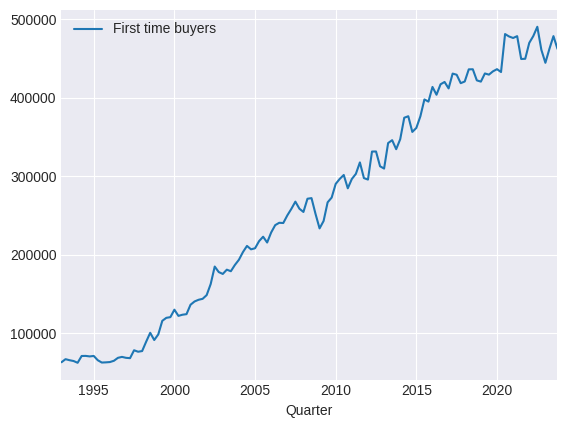

In [18]:
Houseprice_df = pd.read_csv('London Dataset First Time Buyers.csv', index_col='Quarter', parse_dates=True)
Houseprice_df.index.freq='QS'
Houseprice_df.plot();

This decomposes the data set and breaks the data into trend, seasonality, and residual data. This is using a multiplicative model, as the seasonal trend grow with time.

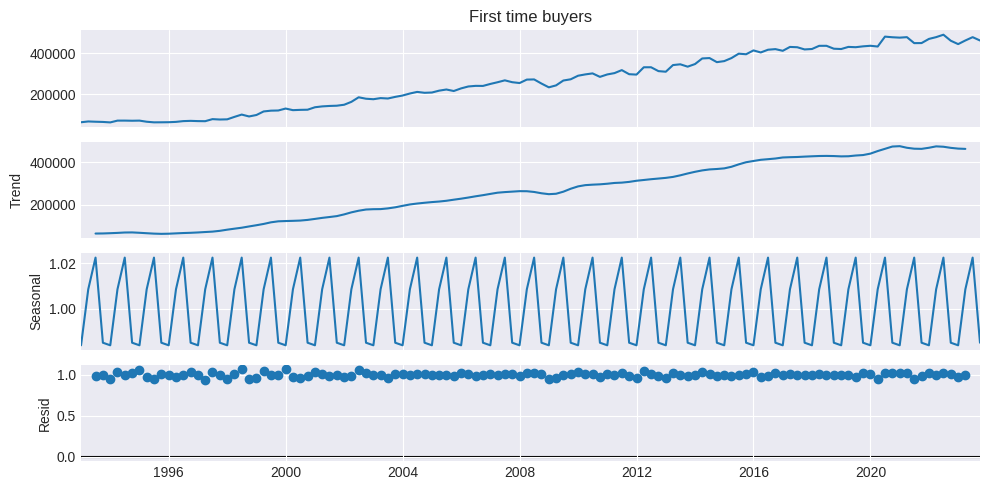

In [19]:
decomp=sm.tsa.seasonal_decompose(Houseprice_df['First time buyers'], model='multiplicative', period=4)
fig = decomp.plot()
fig.set_size_inches((10, 5))
fig.tight_layout()
plt.show()

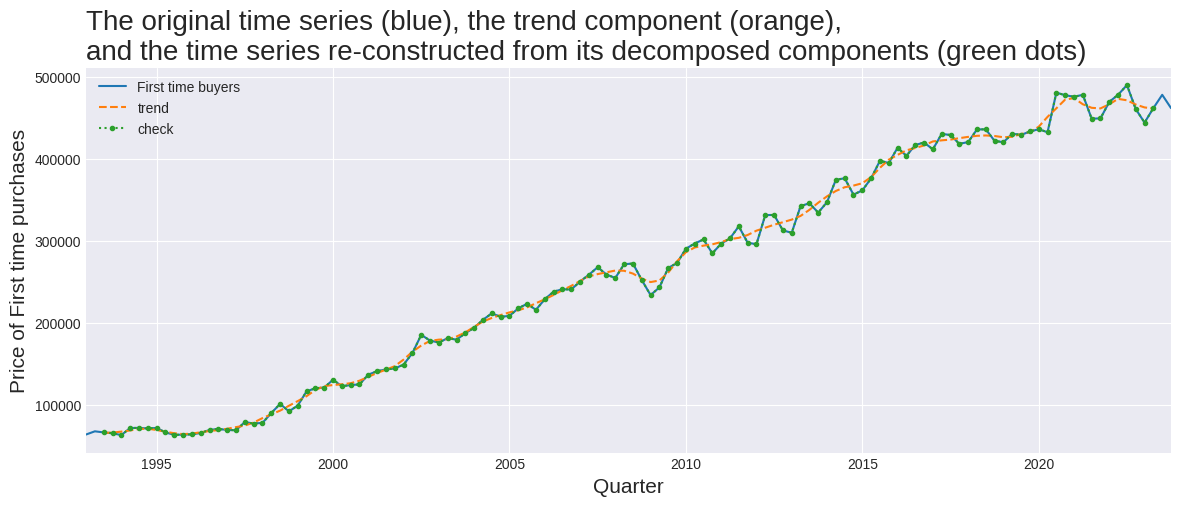

In [20]:
df=decomp.observed.to_frame().join(decomp.resid).join(decomp.trend).join(decomp.seasonal)
df['check'] = df['resid'] * df['trend'] * df['seasonal']
df[['First time buyers','trend','check']].plot(style=['-','--',':.'],figsize=(14,5))

plt.title("""The original time series (blue), the trend component (orange),
and the time series re-constructed from its decomposed components (green dots)""", fontsize = 20,loc='left')
plt.xlabel('Quarter', fontsize = 15)
plt.ylabel('Price of First time purchases', fontsize = 15);

Test and train splitting occurs at this stage. This allows the data to be seperated into test and train values. Meaning the train data is used to build the models assumptions, and the test data trains those assuimptions on prexisting data ready for data that has not been seen before.

In [21]:
train_data =  Houseprice_df[:'2019']
test_data = Houseprice_df['2020':]

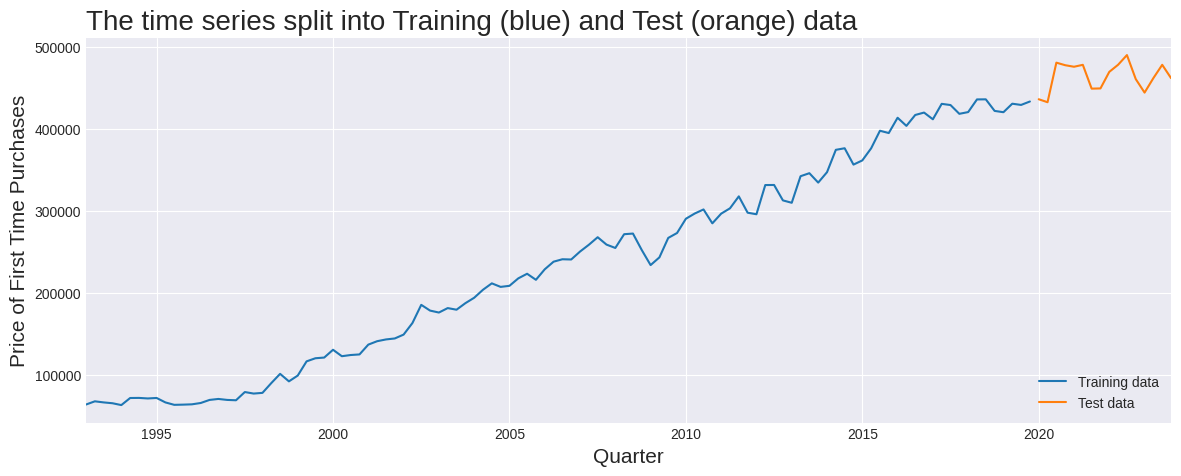

In [22]:
ax = train_data.plot()
test_data.plot(ax=ax,style=['-','--'],figsize=(14 ,5))
plt.legend(labels=['Training data', 'Test data'], loc=4)

plt.title("""The time series split into Training (blue) and Test (orange) data""", fontsize=20, loc='left')
plt.xlabel('Quarter', fontsize=15)
plt.ylabel('Price of First Time Purchases', fontsize=15);

ETS model function is used to gain a baseline model. As the smoothing level was close to 1 it relies heavily on the previous number given in the sequence. This means the model showcases a naive sequence

In [23]:
ets_model_simple= sm.tsa.ETSModel(train_data['First time buyers'].astype('float64'),
                                error='add',
                                trend=None,
                                seasonal=None).fit()

ets_model_simple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 ETS Results                                  
==============================================================================
Dep. Variable:      First time buyers   No. Observations:                  108
Model:                       ETS(ANN)   Log Likelihood               -1157.711
Date:                Wed, 08 May 2024   AIC                           2321.422
Time:                        06:47:03   BIC                           2329.468
Sample:                    01-01-1993   HQIC                          2324.684
                         - 10-01-2019   Scale                    119785226.690
Covariance Type:               approx                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
smoothing_level     0.9999      0.166      6.010      0.000       0.674       1.326
initial_level    6.407e+04    1.1e+04      5.843      0.000    4.26e+04    8.56e+04
===================================================================================
Ljung-Box (Q):                       24.84   Jarque-Bera (JB):                 3.47
Prob(Q):                              0.00   Prob(JB):                         0.18
Heteroskedasticity (H):               5.78   Skew:                             0.21
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

<ipython-input-24-5c0c4ebad03e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['fitted_values'] = ets_model_simple.fittedvalues # add the fitted values from the model


,First time buyers,fitted_values
Quarter,,
1993-01-01,63398,64065.933334
1993-04-01,67307,63398.066793
1993-07-01,65977,67306.609107
1993-10-01,64954,65977.132961
1994-01-01,62711,64954.102313


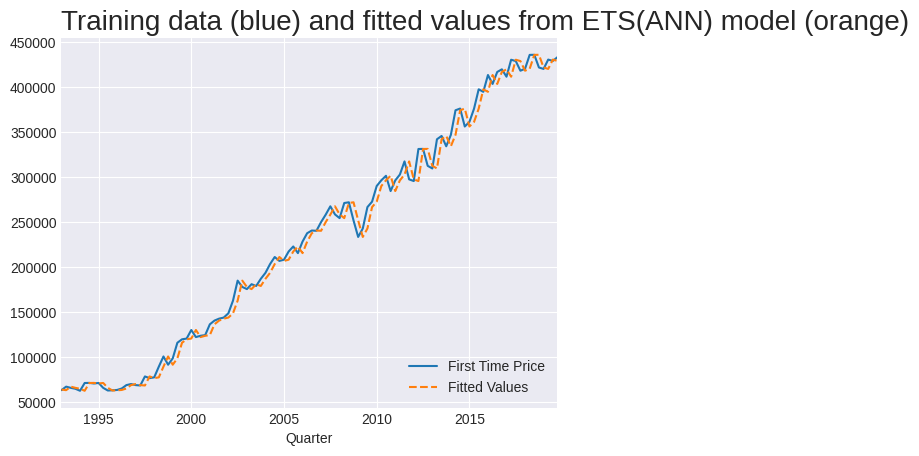

In [24]:
train_data['fitted_values'] = ets_model_simple.fittedvalues # add the fitted values from the model
train_data.plot(style=['-', '--'])

display(train_data.head())

plt.legend(labels=['First Time Price','Fitted Values'], loc=4)
plt.title('Training data (blue) and fitted values from ETS(ANN) model (orange)', fontsize=20, loc='left');

In [25]:
pd.options.mode.chained_assignment = None
test_data['ETS simple forecast (ANN)'] = ets_model_simple.forecast(steps=24)
test_data.head().style

,First time buyers,ETS simple forecast (ANN)
Quarter,,
2020-01-01 00:00:00,436190,433431.580915
2020-04-01 00:00:00,432545,433431.580915
2020-07-01 00:00:00,480864,433431.580915
2020-10-01 00:00:00,477747,433431.580915
2021-01-01 00:00:00,475860,433431.580915


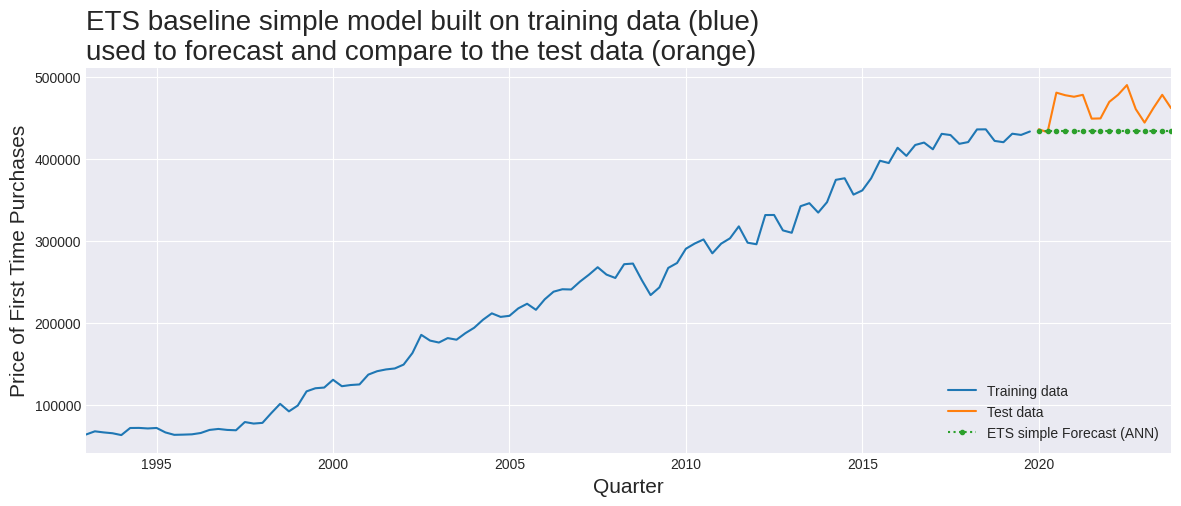

In [26]:
ax = train_data['First time buyers'].plot()
test_data.plot(ax=ax,style=['-',':.',':.'],figsize=(14,5))
plt.legend(labels=['Training data','Test data','ETS simple Forecast (ANN)'],loc=4)

plt.title("""ETS baseline simple model built on training data (blue)
used to forecast and compare to the test data (orange)""", fontsize = 20,loc='left')
plt.xlabel('Quarter', fontsize = 15)
plt.ylabel('Price of First Time Purchases', fontsize = 15);

Below is a purpose built Error Trend Seasonality (ETS) being built specifically for the train set of data. Doing this allows the model to have the option to change between using additive and multiplicative for the different model values.

18197.32  (Root Mean Squared Error RMSE)
3.13  (Mean Absolute Percentage Error MAPE)


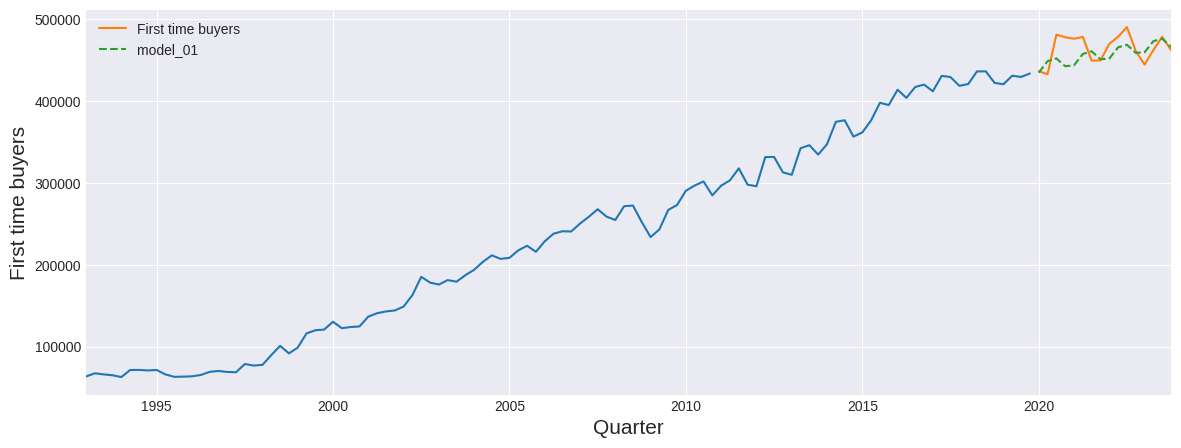

In [27]:
import numpy as np

# https://stats.stackexchange.com/a/294069
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# 1: Build Model on training data
model_01= sm.tsa.ETSModel(train_data['First time buyers'].astype('float64'),
                          error='add',
                          trend='add',
                          damped_trend=True,
                          seasonal='add',
                          seasonal_periods=4,
                          freq='QS').fit()

# 2: Use model to forecast across same time span as test data
test_data['model_01'] = model_01.forecast(steps=108) # does the forecast on the test data

# 3: Plot forecast against real values in test data
ax = train_data['First time buyers'].loc['1993':].plot()
test_data[['First time buyers','model_01']].plot(ax=ax,style=['-', '--', ':.'],figsize=(14, 5))
plt.xlabel('Quarter', fontsize=15)
plt.ylabel('First time buyers', fontsize=15);

# 4: Compare forecast to actual values statistically in test data
rmse = sm.tools.eval_measures.rmse(test_data['First time buyers'], test_data['model_01']).round(2)
mape = mean_absolute_percentage_error(y_true=test_data['First time buyers'], y_pred=test_data['model_01'])
print(rmse, ' (Root Mean Squared Error RMSE)')
print(round(mape, 2), ' (Mean Absolute Percentage Error MAPE)')

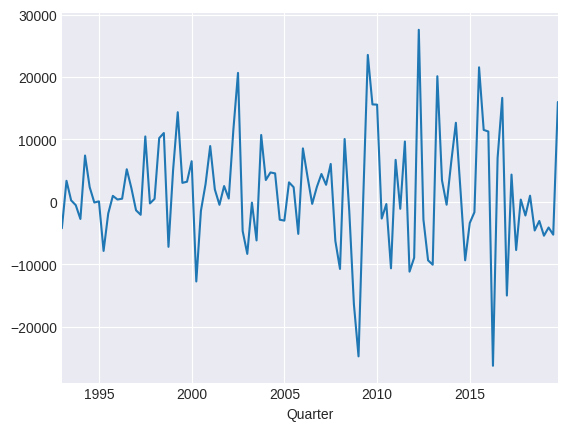

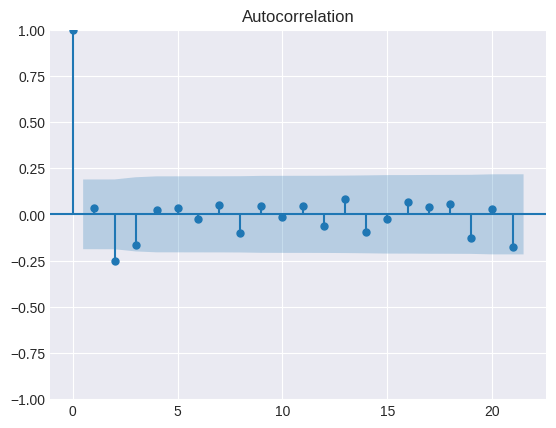

In [28]:
model_01.resid.plot();
statsmodels.graphics.tsaplots.plot_acf(model_01.resid,missing='drop',alpha=0.05,zero=True);

In [29]:
model_01.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 ETS Results                                  
==============================================================================
Dep. Variable:      First time buyers   No. Observations:                  108
Model:                      ETS(AAdA)   Log Likelihood               -1137.935
Date:                Wed, 08 May 2024   AIC                           2297.870
Time:                        06:47:05   BIC                           2327.374
Sample:                    01-01-1993   HQIC                          2309.833
                         - 10-01-2019   Scale                     83053359.956
Covariance Type:               approx                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
smoothing_level        0.8690      0.127      6.840      0.000       0.620       1.118
smoothing_trend        0.0458        nan        nan        nan         nan         nan
smoothing_seasonal     0.1113      0.057      1.962      0.050       0.000       0.222
damping_trend          0.9800        nan        nan        nan         nan         nan
initial_level       6.774e+04   6734.068     10.059      0.000    5.45e+04    8.09e+04
initial_trend       -104.2219        nan        nan        nan         nan         nan
initial_seasonal.0 -1049.1563   4162.902     -0.252      0.801   -9208.295    7109.982
initial_seasonal.1  -713.7187   3576.003     -0.200      0.842   -7722.557    6295.119
initial_seasonal.2   278.4375   3769.517      0.074      0.941   -7109.681    7666.556
initial_seasonal.3          0   3222.721          0      1.000   -6316.417    6316.417
===================================================================================
Ljung-Box (Q):                       12.35   Jarque-Bera (JB):                 5.29
Prob(Q):                              0.14   Prob(JB):                         0.07
Heteroskedasticity (H):               4.18   Skew:                             0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
[2] Covariance matrix is singular or near-singular, with condition number 4.28e+16. Standard errors may be unstable.
"""

In [30]:
# Fit a final ETS model with chosen parameters
final_model= sm.tsa.ETSModel(Houseprice_df['First time buyers'].astype('float64'),
                             error='mul',
                             trend='mul',
                             damped_trend=False,
                             seasonal='mul',
                             seasonal_periods=4,
                             freq='QS').fit()

Due to the type of data the range of results the prediction will bring back will be high. This is due to the high smoothing level.

In [31]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 ETS Results                                  
==============================================================================
Dep. Variable:      First time buyers   No. Observations:                  124
Model:                       ETS(MMM)   Log Likelihood               -1310.164
Date:                Wed, 08 May 2024   AIC                           2640.328
Time:                        06:47:05   BIC                           2668.531
Sample:                    01-01-1993   HQIC                          2651.784
                         - 10-01-2023   Scale                            0.002
Covariance Type:               approx                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
smoothing_level        0.9999      0.109      9.173      0.000       0.786       1.214
smoothing_trend     9.999e-05        nan        nan        nan         nan         nan
smoothing_seasonal      1e-08        nan        nan        nan         nan         nan
initial_level       6.774e+04        nan        nan        nan         nan         nan
initial_trend          1.0165      0.004    256.639      0.000       1.009       1.024
initial_seasonal.0     1.0016        nan        nan        nan         nan         nan
initial_seasonal.1     1.0411        nan        nan        nan         nan         nan
initial_seasonal.2     1.0274        nan        nan        nan         nan         nan
initial_seasonal.3     1.0000        nan        nan        nan         nan         nan
===================================================================================
Ljung-Box (Q):                       20.88   Jarque-Bera (JB):                 5.20
Prob(Q):                              0.01   Prob(JB):                         0.07
Heteroskedasticity (H):               0.30   Skew:                             0.38
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

This is where the final model is used with the get predictions function to look at future forecasts based on the test data. This is the Time Series analysis being completed.

In [32]:
pred = final_model.get_prediction(start='2024', end='2025')
df = pred.summary_frame(alpha=0.05)

df.head(8)

,mean,mean_numerical,pi_lower,pi_upper
2024-01-01,468883.389276,468612.533261,430710.162986,507469.352864
2024-04-01,489709.834664,488905.996390,433858.409921,546144.476057
2024-07-01,504451.815931,503528.655136,433133.355627,578661.716814
2024-10-01,493316.662585,492457.767112,413946.200350,571503.794077
2025-01-01,500670.362578,499594.950720,412585.081591,594112.521456


The overall trend shows that strong growth is excpected.

This trend proves the hypothesis correct for this model, as strong growth is predicted. This is the only model that was proven correct both All houses and New builds either partially were correct or showed the opposite.

The 95% accurate range is relative wide. This will impact the types of decsions and informed actions taken off the back of the analysis model. This is because the range of potential values is so varied it becomes hard to perform action based on this.


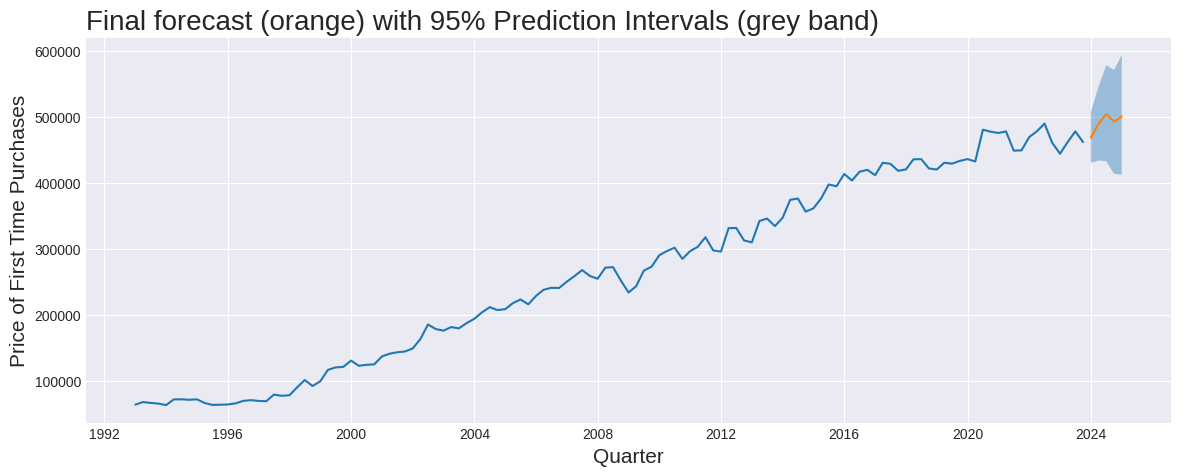

In [33]:
fig, ax = plt.subplots(figsize=(14,5))

ax.plot(Houseprice_df['First time buyers'])
ax.plot(df['mean'])
ax.fill_between(df.index,y1=df['pi_lower'],y2=df['pi_upper'], alpha=0.4)

plt.title("""Final forecast (orange) with 95% Prediction Intervals (grey band)""", fontsize = 20,loc='left')
plt.xlabel('Quarter', fontsize = 15)
plt.ylabel('Price of First Time Purchases', fontsize = 15);

For future analysis model, addressing the wide value ranges that are prejected would be important to take into consideration.
